In [688]:
import cv2
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [689]:
img1 = cv2.imread("final_DLA_image_M150_N1000_k1.0.png")
img2 = cv2.imread("final_DLA_image_M150_N1000_kn0.5.png")
img3 = cv2.imread("final_DLA_image_M150_N1000_kn0.1.png")
img4 = cv2.imread("final_DLA_image_M150_N1000_kn0.05.png")
img5 = cv2.imread("final_DLA_image_M150_N1000_kn0.01.png")
img6 = cv2.imread("final_DLA_image_M150_N1000_k0.005.png")

In [690]:
h,w,p = np.shape(img1)
img = [img1, img2, img3, img4, img5, img6]

In [691]:
print(h,w,p)

150 150 3


In [692]:
# i = 75
# for j in range(0,150):
#     r,g,b = img[i,j]
#     print(r,g,b)

In [693]:
N = 1000
M = h
logN = np.log(N)

In [694]:
f = M*M/N
f

22.5

In [695]:
random.uniform(0,1)

0.9396119708176766

In [696]:
print("size:", M, "x", M)

size: 150 x 150


In [697]:
def find_radius(img):
    h,w,p = np.shape(img)
    max_rad = 0;
    for i in range(0,h):
        for j in range(0,w):
            r,g,b = img[i,j]
            if r == 0 or r<10: #r<10 condition to be removed as not required for png images
                rad = (np.abs(M/2 - i))*(np.abs(M/2 - i)) + (np.abs(M/2 - j))* (np.abs(M/2 - j))
                rad = np.sqrt(rad)
                if max_rad < rad:
                    max_rad = rad
                    
    return max_rad        

In [698]:
def particle_in_center_MxM(img, M, m):
    #find out the center square portion in which the number of particles present to be checked
    #p1 to p4 : top left to clock-wise
    p1 = np.array([M/2 - m/2, M/2 - m/2])
    p2 = np.array([M/2 - m/2, M/2 + m/2])
    p3 = np.array([M/2 + m/2, M/2 + m/2])
    p4 = np.array([M/2 + m/2, M/2 - m/2])
    p1=p1.astype(int)
    p2=p2.astype(int)
    p3=p3.astype(int)
    p4=p4.astype(int)
    #print(M, m)
    #print(p1, p2, p3, p4)
    
    area = m*m
    no_particles = 0
    for i in range(p1[0],p4[0]):
        for j in range(p1[1],p2[1]):
            r,g,b = img[i,j]
            if r == 0 and g == 0 and b ==0:
                no_particles = no_particles +1

    return no_particles, area

In [874]:
d=np.zeros((5, 5))
#d[2][3] = 23
#print(d)
for f in range(0, 5):
    for i in range (2, 7):
        p,a = particle_in_center_MxM(img[f], M, np.power(2,i))
        #print('img'+str(f+1))
        #print("area:" ,a, "population: ", p)
        density = p/a
        #print(f, i-1, density)
        d[f][i-2] = density
        #print("-------------------------")
print(d)

[[0.375      0.328125   0.28515625 0.19335938 0.13867188]
 [0.5625     0.375      0.28125    0.22167969 0.16333008]
 [0.5625     0.53125    0.47265625 0.37402344 0.21582031]
 [0.375      0.453125   0.48828125 0.40332031 0.22924805]
 [0.875      0.640625   0.6640625  0.60839844 0.24414062]]


In [720]:
d[:, 3]

array([0.19335938, 0.22167969, 0.37402344, 0.40332031, 0.60839844])

In [910]:
r1 = find_radius(img1) #1.0
r2 = find_radius(img2) #0.5
r3 = find_radius(img3) #0.1
r4 = find_radius(img4) #0.05
r5 = find_radius(img5) #0.01
r6 = find_radius(img6) #0.005

stickiness = [1.0, 0.5, 0.1, 0.05, 0.01]
r = [r1,r2, r3, r4,r5]
r

[43.278170016764804,
 52.80151512977634,
 54.405882034941776,
 50.32891812864648,
 61.40032573203501]

In [903]:
d[0]

array([0.375     , 0.328125  , 0.28515625, 0.19335938, 0.13867188])

In [904]:
pi = [1, 2, 3, 4, 5]

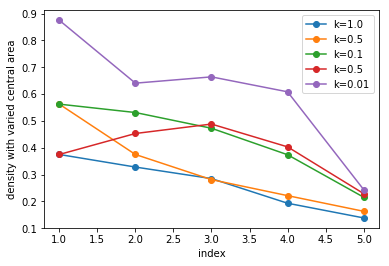

In [905]:
plt.plot(pi, d[0], marker = 'o', label='k=1.0')
plt.plot(pi, d[1], marker = 'o', label='k=0.5')
plt.plot(pi, d[2], marker = 'o', label='k=0.1')
plt.plot(pi, d[3], marker = 'o', label='k=0.5')
plt.plot(pi, d[4], marker = 'o', label='k=0.01')
plt.xlabel('index')
plt.ylabel('density with varied central area')
plt.legend()

plt.show()

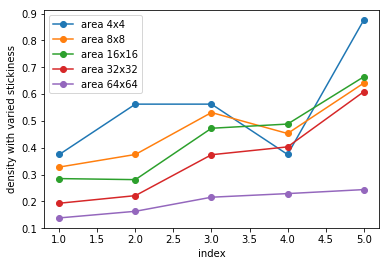

In [906]:
plt.plot(pi, d[:,0], marker='o', label='area 4x4')
plt.plot(pi, d[:,1], marker='o', label='area 8x8')
plt.plot(pi, d[:,2], marker='o', label='area 16x16')
plt.plot(pi, d[:,3], marker='o', label='area 32x32')
plt.plot(pi, d[:,4], marker='o', label='area 64x64')
plt.xlabel('index')
plt.ylabel('density with varied stickiness')
plt.legend()

plt.show()

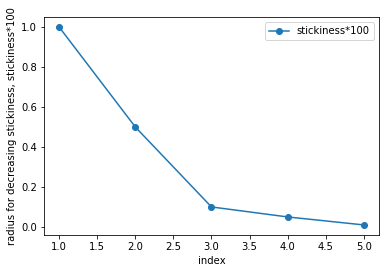

In [907]:
#plt.plot(pi, r, marker = 'o', label='radius')
plt.plot(pi, (stickiness), marker = 'o', label='stickiness*100')

plt.xlabel('index')
plt.ylabel('radius for decreasing stickiness, stickiness*100')
plt.legend()
plt.show()

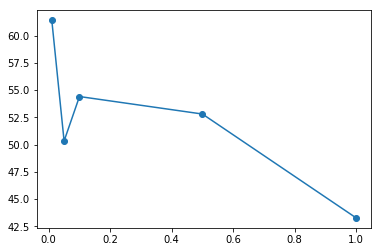

In [908]:
plt.plot(stickiness, r, marker='o')
plt.show()

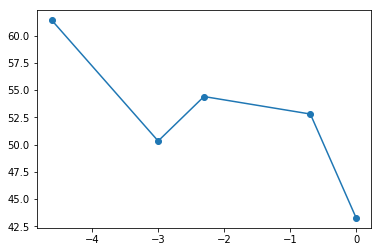

In [909]:
plt.plot(np.log(stickiness), r, marker = 'o')
plt.show()

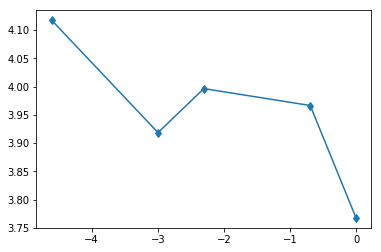

In [911]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# for xy in zip(np.log(stickiness), np.log(r)):
#    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.plot(np.log(stickiness), np.log(r), marker = 'd')
plt.show()

In [912]:
stickiness[::-1]

[0.01, 0.05, 0.1, 0.5, 1.0]

In [913]:
img1 = cv2.imread("DLA_m100_n100_k1.0.png")
img2 = cv2.imread("DLA_m100_n200_k1.0.png")
img3 = cv2.imread("DLA_m100_n400_k1.0.png")
img4 = cv2.imread("DLA_m100_n600_k1.0.png")
img5 = cv2.imread("DLA_m100_n800_k1.0.png")
# img6 = cv2.imread("DLA_m100_n1000_k1.0.png")
# img7 = cv2.imread("DLA_m100_n1200_k1.0.png")


In [914]:
r1 = find_radius(img1)
r2 = find_radius(img2)
r3 = find_radius(img3)
r4 = find_radius(img4)
r5 = find_radius(img5)
# r6 = find_radius(img6)
# r7 = find_radius(img6)
ra1 = [r1, r2, r3, r4, r5]
print(ra1)

[44.40720662234904, 57.3149195236284, 62.96824596572466, 82.34682750416071, 89.8276126811795]


In [915]:
img1 = cv2.imread("DLA_m100_n100_k0.1.png")
img2 = cv2.imread("DLA_m100_n200_k0.1.png")
img3 = cv2.imread("DLA_m100_n400_k0.1.png")
img4 = cv2.imread("DLA_m100_n600_k0.1.png")
img5 = cv2.imread("DLA_m100_n800_k0.1.png")
# img6 = cv2.imread("DLA_m100_n1000_k0.1.png")
# img7 = cv2.imread("DLA_m100_n1200_k0.1.png")
r1 = find_radius(img1)
r2 = find_radius(img2)
r3 = find_radius(img3)
r4 = find_radius(img4)
r5 = find_radius(img5)
# r6 = find_radius(img6)
# r7 = find_radius(img6)
ra2 = [r1, r2, r3, r4, r5]
print(ra2)

[45.34313619501854, 51.40038910358559, 51.66236541235796, 68.79680225126747, 63.89053137985315]


In [916]:
img1 = cv2.imread("DLA_m100_n100_k0.01.png")
img2 = cv2.imread("DLA_m100_n200_k0.01.png")
img3 = cv2.imread("DLA_m100_n400_k0.01.png")
img4 = cv2.imread("DLA_m100_n600_k0.01.png")
img5 = cv2.imread("DLA_m100_n800_k0.01.png")
# img6 = cv2.imread("DLA_m100_n1000_k0.1.png")
# img7 = cv2.imread("DLA_m100_n1200_k0.1.png")
r1 = find_radius(img1)
r2 = find_radius(img2)
r3 = find_radius(img3)
r4 = find_radius(img4)
r5 = find_radius(img5)
# r6 = find_radius(img6)
# r7 = find_radius(img6)
ra3 = [r1, r2, r3, r4, r5]
print(ra3)

[43.278170016764804, 52.80151512977634, 54.405882034941776, 50.32891812864648, 61.40032573203501]


In [917]:
n = [100, 200, 400, 600, 800]
logn = (np.log(n))

In [918]:
logra1 = (np.log(ra1))
logra2 = (np.log(ra2))
logra3 = (np.log(ra3))
print(logra1, logra2, logra3)

[3.79340177 4.04856097 4.14263057 4.41093993 4.49789242] [3.81425881 3.93964574 3.94472957 4.23115726 4.15717117] [3.76764835 3.96653989 3.99647227 3.91857983 4.11741514]


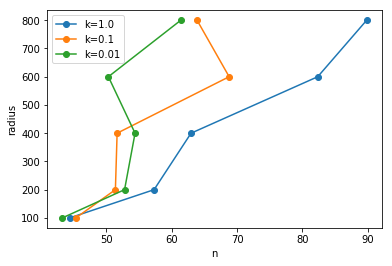

In [919]:

plt.plot((ra1), (n), marker='o', label='k=1.0')
plt.plot((ra2), (n), marker='o', label='k=0.1')
plt.plot((ra3), (n), marker='o', label='k=0.01')

plt.xlabel('n')
plt.ylabel('radius')
plt.legend()
plt.show()

In [920]:
slope10x = (n[3]-n[0])/(ra1[3]-ra1[0])
print(slope10x)

slope01x = (n[3]-n[0])/(ra2[3]-ra2[0])
print(slope01x)

slope001x = (n[3]-n[0])/(ra3[3]-ra3[0])
print(slope001x)

13.178834906062567
21.318628772186404
70.91446071622066


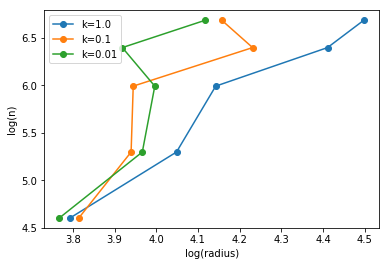

In [921]:
# plt.plot(np.log(n), np.log(ra1), marker='o')
# plt.plot(np.log(n), np.log(ra2), marker='d')
# plt.plot(np.log(n), np.log(ra3), marker='s')

plt.plot(np.log(ra1), np.log(n), marker='o', label='k=1.0')
plt.plot(np.log(ra2), np.log(n), marker='o', label='k=0.1')
plt.plot(np.log(ra3), np.log(n), marker='o', label='k=0.01')

plt.xlabel('log(radius)')
plt.ylabel('log(n)')
plt.legend()
plt.show()

In [922]:
slope10 = (logn[3]-logn[0])/(logra1[3]-logra1[0])
print(slope10)

slope01 = (logn[3]-logn[0])/(logra2[3]-logra2[0])
print(slope01)

slope001 = (logn[3]-logn[0])/(logra3[3]-logra3[0])
print(slope001)

2.9014554474119505
4.297831911031576
11.871344156183577


In [923]:
slope = [slope10, slope01, slope001]

In [924]:
slopeN = [slope10/slope10, slope01/slope10, slope001/slope10] 
stickiness_predicted = np.reciprocal(np.exp(slopeN))

In [925]:
print(stickiness_predicted)

[0.36787944 0.22734932 0.01671392]


In [927]:
stickiness_actual = [1.0,0.1,0.01]
print(stickiness_actual)

[1.0, 0.1, 0.01]
